In [1]:
import sys
from pathlib import Path

module_path = str(Path().resolve().parent / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from semiring_geometry import nsr
INF = nsr.INF

[(4, 7), (4, 6), (-3, 0), (-2, 0)]


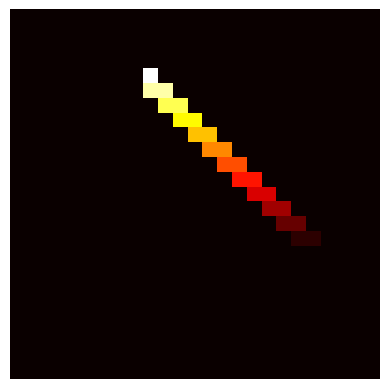

In [40]:
import numpy as np
import matplotlib.pyplot as plt

INF = nsr.INF

def get_ascii_diagram(element) -> str:

    boundary = element.get_boundary()
    points = [p for p in boundary if INF not in p and -INF not in p]
    # print(points)

    if len(points) > 0:

        start = min([p[0] for p in points])
        stop = max([p[1] for p in points])

        border = (stop - start) / 6
        start, stop = start - border, stop + border
    else:
        start, stop = 0, 10

    indices = np.linspace(start, stop, num=25)

    diagram = ""
    for i in indices:
        for j in indices:
            value = f"{element.get_entry(i, j)} "
            # print(f"{i = }, {j = } : {value = }")

            if element.get_entry(i, j) > 0:
                value = "*"
            else:
                value = "-"

            diagram += value
        diagram += "\n"

    return diagram

def get_heat_map(element):
    boundary = element.get_boundary()
    print(boundary)
    points = [p for p in boundary if INF not in p and -INF not in p]

    if len(points) > 0:

        start = min([p[0] for p in points])
        stop = max([p[1] for p in points])

        border = (stop - start) / 6
        start, stop = start - border, stop + border
    else:
        start, stop = 0, 10

    indices = np.linspace(start, stop, num=25)


    array = [[] for k in indices]
    for idx, i in enumerate(indices):
        for idy, j in enumerate(indices):
            value = element.get_entry(i, j)
            array[idx].append(value)
    
    plt.imshow(array, cmap='hot', interpolation='nearest')
    plt.axis('off')
    plt.show()

    return array

# diagram = get_ascii_diagram(nsr.Contact(1, 2, 5))
# element = nsr.Contact(1, 2, 5)
# element = nsr.Storage(4) * nsr.Contact(0, 1, 0)
# diagram = get_ascii_diagram(element)
# print(diagram)

# element = nsr.Storage()
# element = nsr.Contact.identity()
# element = nsr.Storage.identity()
# element = nsr.Contact(1, 2, 5)
# element = nsr.Storage() * nsr.Contact(0, 1, 0)
# element = nsr.Storage(4) * nsr.Contact(0, 1, 0)
element = nsr.Contact(0, 4, 2) * nsr.Storage(1) * nsr.Contact(0, 4, 0)
element = nsr.Contact(-INF, 4, 2) * nsr.Storage(1) * nsr.Contact(0, INF, 0)
get_heat_map(element);
